# 🏂 Holt Winters Model (Seasonal Version)
Now, it has the WINTER component, meaning *the season of winter will be covered* 😁 <br>
**Nah**, here winters is not the ***season***!

### 🤷‍♂️ But why Winters?
Now obviously you will get this doubt that *there can be a name like **holt** but, what about **winter** part? Does that show some kind of seasonality*? Hah, looking on the internet:

> Holt-Winter's Exponential Smoothing as named after its **two contributors**: Charles ***Holt*** and Peter ***Winter*** is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting.

અરે યાર, winter કોઈનો નામ પણ હોય! 🙄

____

We started our journey of forecasting with:
- Simple MA
- Exponentially MA

Till now **no** forecasting was done.
- Simple Exponential Smoothing (The EWMA but repeated the last term `h` times) | **No Season, No Trend**
- Holt model (Added the *trend* in the calculation) | **No Season, Yes Trend**

And, now you *might* feel the *real* forecasting. Because it is:
- Holt Winter's model | **Yes Season, Yes Trend**.

###### 

### ❄ The components, visually

We will plot the values with *our* data when we will get into that part, but for now - let's have a look at how 3 of the components look like when they are plotted.

<img src="../images/holt-winters-1.png" height=400 width=500>

- See, that season component has **only** extracted the fluctuations overtime
- The trend (slope) shows **when** was what kind of trend in time. Still, it is not much intuative
- The level is just the EWMA at that perticular time so, nothing much to tell about it

But, don't worry we will see this in action in out `passengers` dataset soon. First, let's get into the nitty gritty stuff of this model.

## 

### `2` Ways to Model The Problem
Meaning, there are **2** ways to put the **equation into an action**. Which equation? — The Main Forecast Equation $\hat y_{t + h | t} $.

1. Additive Method — Seasonal comp. is ***added***
    - y = level + trend + seasonal
2. Multiplicative Method — Seasonal comp. is ***multiplied***
    - y = (level + trend) * seasonal

Let's see how it works & how it affects the following equations.

##### 

## ➕ Additive Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $$

- Bro! The most of the equation is just the ***same*** as we have seen in the Holt's model!
- And the remaining is to be understood only! What an ease!
- Now, things are gonna get a **level forward**. Here, you will have to *look back in time for frequany `m` and for the latest time `k`.*

I know, I know things are looking foreign to you, but we will understand that a bit better*ly*. And for that we have a dedicated section for our $s_{t + h - mk}$ only. Let's ***de-mystify*** the seasonal term! We are coming winter! 😈

# $$ s_{t + h - mk} $$

- $t:$ It is the last known time of the real observation (hence we add $h$ to it to show the future time).

- $h:$ It is the steps to look forward in the future.


- $m:$ Defines the **period** of the seasonal component (you can say a cycle - frequency) which is: *a length of time for the signal to repeat itself*.
    - Thus, if we are looking at the sales data **each month** then the period will be... month? Nah! A year!
    - It is because the analysis goes on for a year (the overall) but they are based on the months.
    - Similarly, if I am looking at my BP data **each second** then the period will be... second? Come on! A day! Or Month!
    - See, the **pattern** or the season can only be seen when you **zoom out** in the time frame. So, it should be intuative.


- $k:$ It is a **number chosen** so that we can ***appropriately*** look back in the training data. To consider the **last** data to be considered.
    - I want to consider the last year's data for each month so... suppose today is **June - 22** and so for that I want my model to take the data from **June - 21** and hence I will take `k` as `1`.
    - But if I want the data 2 years back ie. consider **June - 20** so for that I would take `k` as `2`.
    - See that `k` is **multiplied** with the period term `m` which makes sense as we would get back `k` times on the units of defined as `m`.
    - If `m=12` & `k=1` → Go back 12 months (1 year back)
    - If `m=12` & `k=2` → Go back 24 months (2 years back)
    - If `m=24` & `k=3` → Go back 72 hours (3 days back)
    - **Obviously** the model doesn't know whether there are days, or hours ***it will just go back `mk` units back*** which could be months, days, hours etc.
    
    
- That's not it, mathameticians have given the ***formulae*** to get the value for `k`. Which is: $k = floor(\frac{h - 1}{m} + 1)$
    
> **NOTE**: That only the *level* and *trend* components are from the last known component and the *seasonal* component comes from the last period.

Huff... Amazing Amzing... Please read back **again** if you didn't get it. It is really easy.<br> Once again from my another book: માત્ર આ વાંચ, હાઉ દૂર થઇ જશે. Guerenteed 😉

##### 

#### 2️⃣ Level Equation
# $$l_t = \alpha (y_t - s_{t - m}) + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- Just a single change is here... just a single not more.
- That is: *Subtracting the seasonal component from the real value $y_t$*
- Why is that?
    - Because $y_t$ is ahead of other components, so it is removing some kind of cascading effect from the $y_t$.
    - This is *my weak* assumption behind *why*. It is not sure, but let's keep it that way.

Where, <br>
$l_t:$ Is the level that we know of, again we will see how to initialize and use it. <br>
$b_t:$ Is the trend, which like level is stored in the list and we then have to make things work. <br>
$s_{t - m}:$ Is the seasonal term, ***but*** this time it won't be used as level and trends are being used. We will use it by the **period `m`**. So, there will be the list of all the seasonal components like level & trend *but* the usage might differ.

##### 

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- This is the **same** equation that we have used in the previous holt's model
- To put it in the author's words:
> It's an EWMA of the trend, as measured by the difference in level.

##### 

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma(y_t - l_{t-1} - b_{t - 1}) + (1 - \gamma)s_{t - m}$$

- Looks **strange**? Nah! This might be simpler then the both above! *(I know: exaggeration)*.
- You can see multiple *subtractions* in the first bracket $(y_t - l_{t-1} - b_{t - 1})$
    - That simply is to get the **current** season from the data
    - How to get that? From the equation: $\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $
    - For a moment, **let's remove** the signs of time: $y = l + (b \times h) + s $
    - So to get the seasonal part $s$ we would: $s = y - l - (b \times h) $
    - And... for only one time, `h` will be `1` — Hence: $s = y - l - b $   
- And that's what we have in the above equation!

> **NOTE**: That in the second part of this equation we are having $(1 - \gamma)s_{t-m}$ and see that the $s_{t-m}$ is from the ***previous*** period.

# 

## ❌ Multiplicative Method

#### 1️⃣ Forecast Equation
# $$\hat y_{t + h | t} = (l_t + (b_t \times h)) \times s_{t + h - mk} $$

- Just replaced `+` with `x` and nothing much...

##### 

#### 2️⃣ Level Equation
# $$l_t = \alpha \frac{y_t}{s_{t - m}} + (1 - \alpha)(l_{t - 1} + b_{t - 1})$$

- That small change only... from $(y_t - s_{t - m})$ to → $\left(\frac{y_t}{s_{t - m}}\right)$
- Why? Because see it in as some kind of the *effect of the equation change*.
- We have changed the equation from additive to multiplicative, thus the seasonal term will go in the denominator part.

##### 

#### 3️⃣ Trend Equation
# $$b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$$

- Haash, it is the same...
- But why isn't it being affected?
- It ***is*** being affected, but as *it is based on the difference of the leveles* and the *levels themselves* are affected by the season in the 2️⃣ equation, there is **no need** to give the ***double effect*** here.
- At the EOD, we are just finding the slope.

##### 

#### 4️⃣ Seasonal Equation
# $$s_t = \gamma\left(\frac{y_t}{l_{t-1} - b_{t - 1}}\right) + (1 - \gamma)s_{t - m}$$

- The same thing, based on the equation.
- The the $s$ is multiplied, so the rest should be divided here!

##### 

### 🤨 Do `add` vs `multiply` make difference?

<img src="../images/additive_multiplicative.png" width=500 height=300>

This comparision shows... it does. In our example *(airline passengers)* we should use the *multiplicative* method as the amplitude of the number of the passengers get larger over the time and multiplication will give the better satisfaction to that condition.

But still we will **play around** with the data and see what is reality.

### 

### A Long Story?
I know it has been a long time we have been discussing the theory... so let's code!

### 

### 👨‍💻 The Code

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

Getting confused? Why `ExponentialSmoothing`? <BR>
For that, let's revise what we have used till now.
    
```python
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # SES
from statsmodels.tsa.holtwinters import Holt                 # Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt-Winter
```

And, this is how it is.

In [169]:
df = pd.read_csv("../data/airline_passengers.csv", index_col=0, parse_dates=True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [170]:
df.index.freq = "MS"

In [171]:
# Simply storing the training and testing indices for later use
train_idx = df.index[:-12]
test_idx = df.index[-12:]

In [172]:
# Making the different sets so for convinience later
train = df.loc[train_idx]
test = df.loc[test_idx]

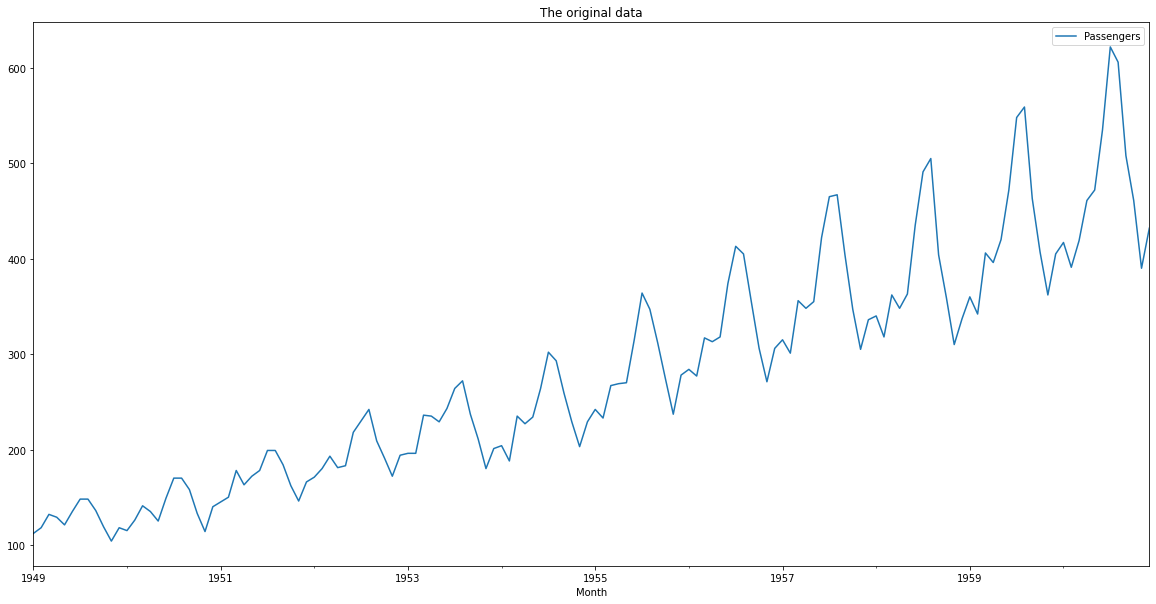

In [7]:
df.plot()
plt.title("The original data");

In [8]:
# See, we are `adding` the seasonal term
model = ExponentialSmoothing(train, 
                    trend="add", seasonal="add",
                    initialization_method="legacy-heuristic", seasonal_periods=12)
model

In [9]:
result = model.fit()

In [10]:
result.params

{'smoothing_level': 0.25117331573474405,
 'smoothing_trend': 2.7585691504016322e-09,
 'smoothing_seasonal': 0.7488266705948149,
 'damping_trend': nan,
 'initial_level': 217.67991754134067,
 'initial_trend': 2.558036365465094,
 'initial_seasons': array([-108.36590295, -102.80503587,  -90.28092616,  -95.48534551,
        -104.27542851,  -90.16363897,  -78.01420173,  -80.4245431 ,
         -94.66382538, -113.49004474, -128.12570119, -111.68866769]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

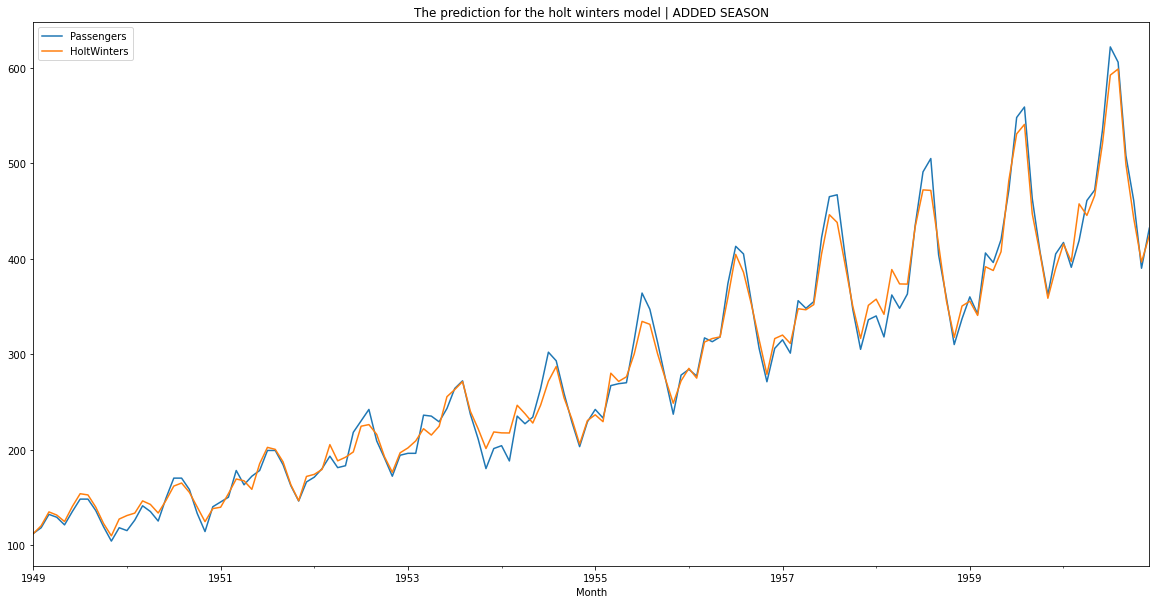

In [12]:
df.plot()
plt.title("The prediction for the holt winters model | ADDED SEASON");

Man! Now we are getting somewhere!!!!

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  11.624714430673352
Test Error:  16.978029847029934


The test error, meaning the forecast error is a bit high...

In [15]:
print("Train R2: ", r2_score(train, result.fittedvalues))
print("Test R2: ", r2_score(test, result.forecast(12)))

Train R2:  0.9880231496157479
Test R2:  0.9479637254375466


###### 

### Coool

Let's now check, with the `multiplicative` method.

In [16]:
model = ExponentialSmoothing(train, 
                    trend="add", seasonal="mul",
                    initialization_method="legacy-heuristic",
                    seasonal_periods=12)

result = model.fit()
df.loc[train_idx, "HoltWinters"] = result.fittedvalues
df.loc[test_idx, "HoltWinters"] = result.forecast(12)

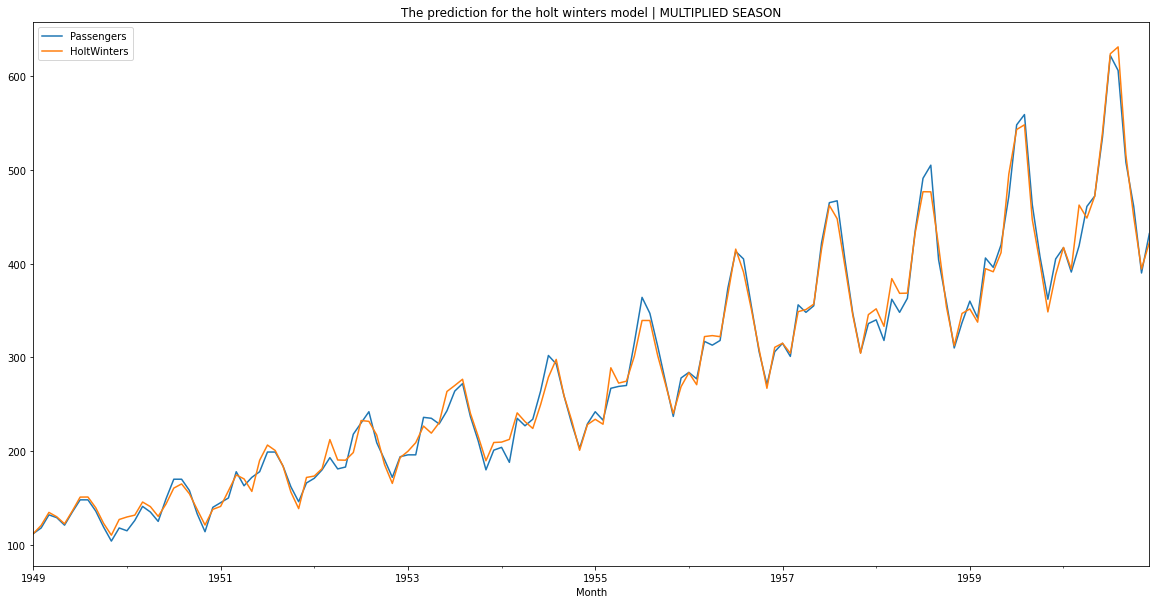

In [17]:
df.plot()
plt.title("The prediction for the holt winters model | MULTIPLIED SEASON");

In [18]:
print("Train Error: ", mean_squared_error(train, result.fittedvalues, squared=False))
print("Test Error: ", mean_squared_error(test, result.forecast(12), squared=False))

Train Error:  9.767995205168011
Test Error:  15.810870232569963


In [19]:
print("Train R2: ", r2_score(train, result.fittedvalues))
print("Test R2: ", r2_score(test, result.forecast(12)))

Train R2:  0.9915435338659261
Test R2:  0.954872304168558


> Thing to note that, we are **no longer** lagging behind! Meaning, the predicted values are **not shifted** behind! 

In [20]:
result.params

{'smoothing_level': 0.376239947834487,
 'smoothing_trend': 2.965920859405779e-10,
 'smoothing_seasonal': 0.62376005213645,
 'damping_trend': nan,
 'initial_level': 203.27921659266266,
 'initial_trend': 4.922136390209008,
 'initial_seasons': array([0.53794595, 0.56633472, 0.62246519, 0.59176846, 0.54686898,
        0.59779552, 0.65053307, 0.64195023, 0.58529915, 0.51023618,
        0.45380958, 0.52338245]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

# 

## 😋 Our Way!

#### Initialization:

- Here, we will have to **look back** to see what does the season say.
- So the initialization will be *a bit* different. But not frightning at all.
- **Initialize $s$ first**: Because others $l$ and $b$ will be dependend on that.
- Then go for $l$ and then $b$.

#### `1.` Season Initialization:

1. Here, we will have to **store all initial seasons**. 
2. Unlike the last methods SES, Holt where we were storing only the first values fo initialization.
3. To initialize the season of $n^{th}, n = {1, \cdots m}$:
    - $s_1 = \frac{y_1}{avg(y_1, \cdots y_m)}$ 
    
    - $s_2 = \frac{y_2}{avg(y_1, \cdots y_m)}$ 
    
    - $s_n = \frac{y_n}{avg(y_n, \cdots y_m)}$ 
4. There, in the `results.params` we can see that the "initial_seasons" are stored in as a list of `12` months.
5. The `12` depends on the `m` that you are going to provide.

### 

#### `2.` Level Initialization:
1. Only seasonals were there to be stored in a bunch, here we will initialize the level ***for once only***.
2. To do that, we will start from the $l_m+1$. Which means, we will skip whole *previous* period and start from the new (2nd) period and initialize the first value there.
    - Suppose 1, 2 ... 12 is the first year.
    - Then: 13, 14 ... 24 is the second year.
    - Hence, we will initialize the $l_{13} = l_{m+1}$
    - Samje na?
3. How?
    - $l_{13} = \frac{y_{13}}{s_1}$
    - Which is, current value divided by previous periods' season value.
    - This is called: **De-seasonalizing**.
    - Only one value is there to be initialized, so no need to write more about this.
    
### 

#### `3.` Trend Initialization:
1. This is the single value initialization only, again.
2. Again, we will start from the $b_{m+1}$.
3. How?
    - $b_{13} = \frac{y_{13}}{s_1} - \frac{y_{12}}{s_{12}}$
    - Kinda crazy...
    

Let's see how that goes.

In [22]:
# The period setting
m = 12

#### Seasion Init

In [173]:
# First `m` (12) time points
train.iloc[:m]

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [174]:
train = train.Passengers

###### 

This formulae: $s_n = \frac{y_n}{avg(y_n, \cdots y_m)}$ 

In [175]:
# Storing in the list called sts
sts = (train.iloc[:m] / train.iloc[:m].mean()).values.reshape(1, -1)[0]
print(sts)
sts = sts.tolist()

[0.88421053 0.93157895 1.04210526 1.01842105 0.95526316 1.06578947
 1.16842105 1.16842105 1.07368421 0.93947368 0.82105263 0.93157895]


In [176]:
print(result.params["initial_seasons"])

[0.53794595 0.56633472 0.62246519 0.59176846 0.54686898 0.59779552
 0.65053307 0.64195023 0.58529915 0.51023618 0.45380958 0.52338245]


The initial seasons **are differing** that is caused by the technique that this library is using. We are using the simpler version.

##### 

#### Level Init

$l_{13} = \frac{y_{13}}{s_1}$

In [177]:
lts = [train.iloc[13 -1] / sts[1 -1]]
lts

[130.05952380952382]

The reason behind `13 -1` is that I have tried to show that `13` is to match the formulae, but in this programming world, it all starts with `0`. So need to shift back. *(And I have written `-1` instead of `- 1` just for pretty styling 😉)*

##### 

#### Trend Init

$b_{13} = \frac{y_{13}}{s_1} - \frac{y_{12}}{s_{12}}$

In [178]:
bts = [(train.iloc[13 -1] / sts[1 -1]) - (train.iloc[12 -1] / sts[12 -1])]
bts

[3.392857142857153]

# 

In [179]:
# Initialization of 𝛼 𝛽 𝛾 
alpha = 0.376239947834487
beta = 2.965920859405779e-10
gamma = 0.62376005213645

In [180]:
train.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: Passengers, dtype: int64

##### 

Now, let's formulate the equations...
- $\hat y_{t + h | t} = l_t + (b_t \times h) + s_{t + h - mk} $

- $l_t = \alpha (y_t - s_{t - m}) + (1 - \alpha)(l_{t - 1} + b_{t - 1})$

- $b_t = \beta(l_t - l_{t - 1}) + (1 - \beta)b_{t - 1}$

- $s_t = \gamma(y_t - l_{t-1} - b_{t - 1}) + (1 - \gamma)s_{t - m}$

In [181]:
# The seasonal value for 13th month (January) - we will need to calculate in a differet cell
sts.append((gamma * (train.iloc[13 -1] - lts[-1] - bts[-1])) + ((1- gamma) * (sts[1 -1])))

In [182]:
internal_forecasts = []

In [183]:
# Starting r 13th month (which is 14) - taking index as they are (no -1)
for t in range(13, train.shape[0]):
    yt = train.iloc[t]
    lt = (alpha * (yt - sts[t - m])) + ((1 - alpha) * (lts[-1] + bts[-1]))
    bt = (beta * (lt - lts[-1])) + ((1 - beta) * bts[-1])
    st = (gamma * (yt - lts[-1] - bts[-1])) + ((1 - gamma) * sts[t - m])
    
    forecast = lt + (bt * 1) + sts[t - m]
    
    lts.append(lt)
    bts.append(bt)
    sts.append(st)
    internal_forecasts.append(forecast)

Alright!

In [184]:
internal_forecasts = pd.Series(internal_forecasts, index=train.index[13:])

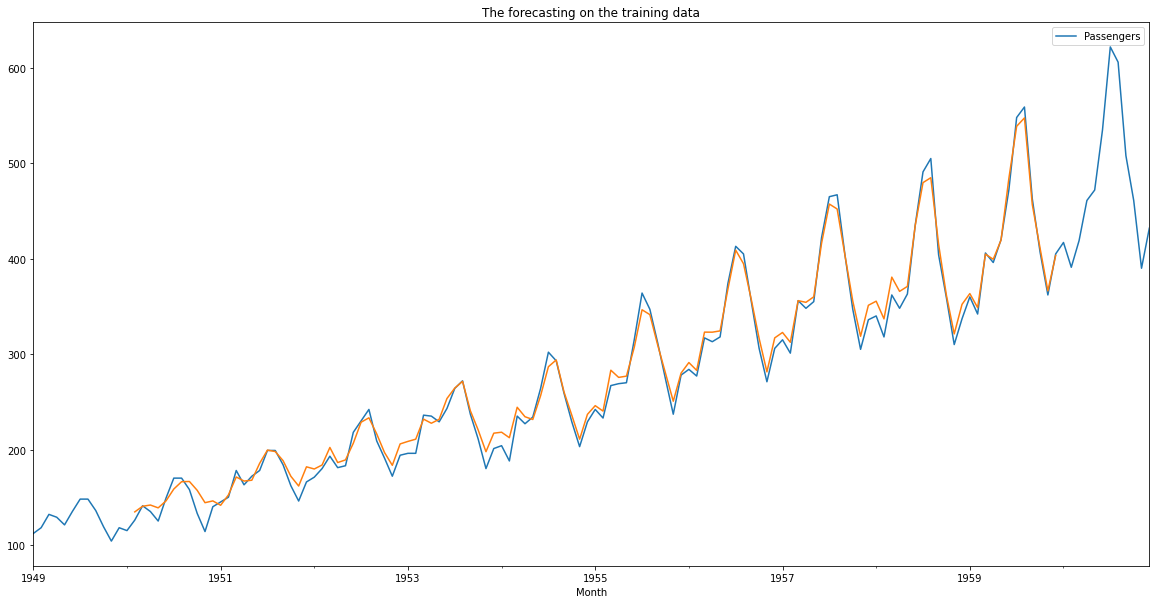

In [194]:
df.plot()
internal_forecasts.plot()
plt.title("The forecasting on the training data");

We are getting it there baby!

In [201]:
t = len(sts)

In [202]:
new_forecasts = []

In [203]:
# Forecasting!
for h in range(1, 13):
    forecast = lts[-1] + (bts[-1] * h) + sts[t+h - m - 1]
    new_forecasts.append(forecast)

In [204]:
new_forecasts = pd.Series(new_forecasts, test.index)

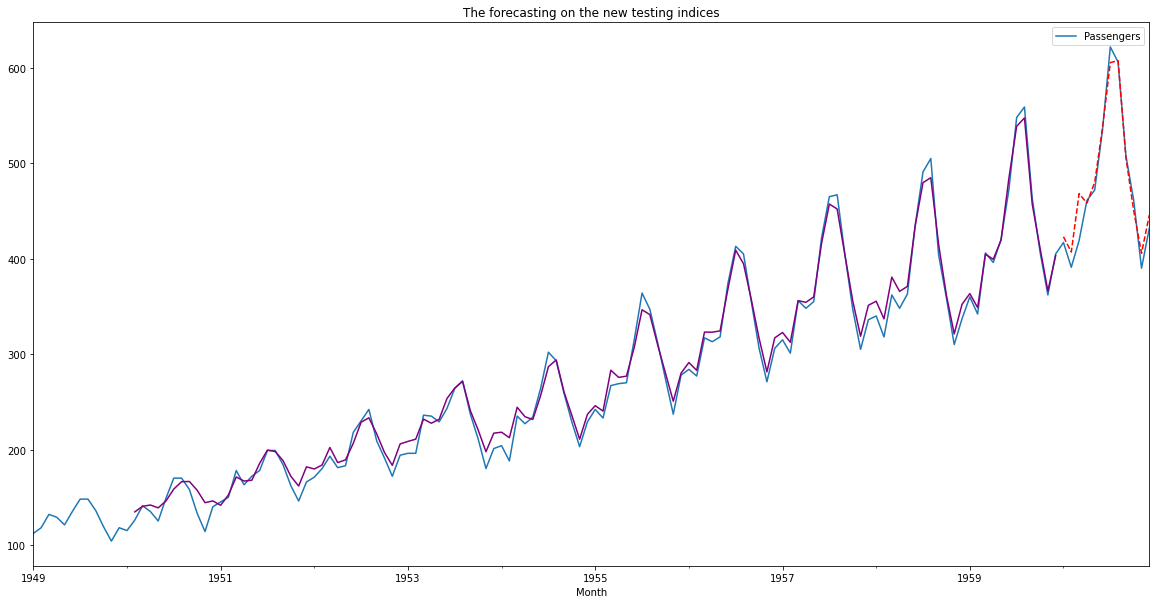

In [207]:
df.plot()
internal_forecasts.plot(color="purple")
new_forecasts.plot(color="red", ls="dashed")
plt.title("The forecasting on the new testing indices");

#### 

A Lot of things we have seen here! Man!

For the first time we have **FORECAST**! I and is done by writing the manual code as well! How crazy is that!

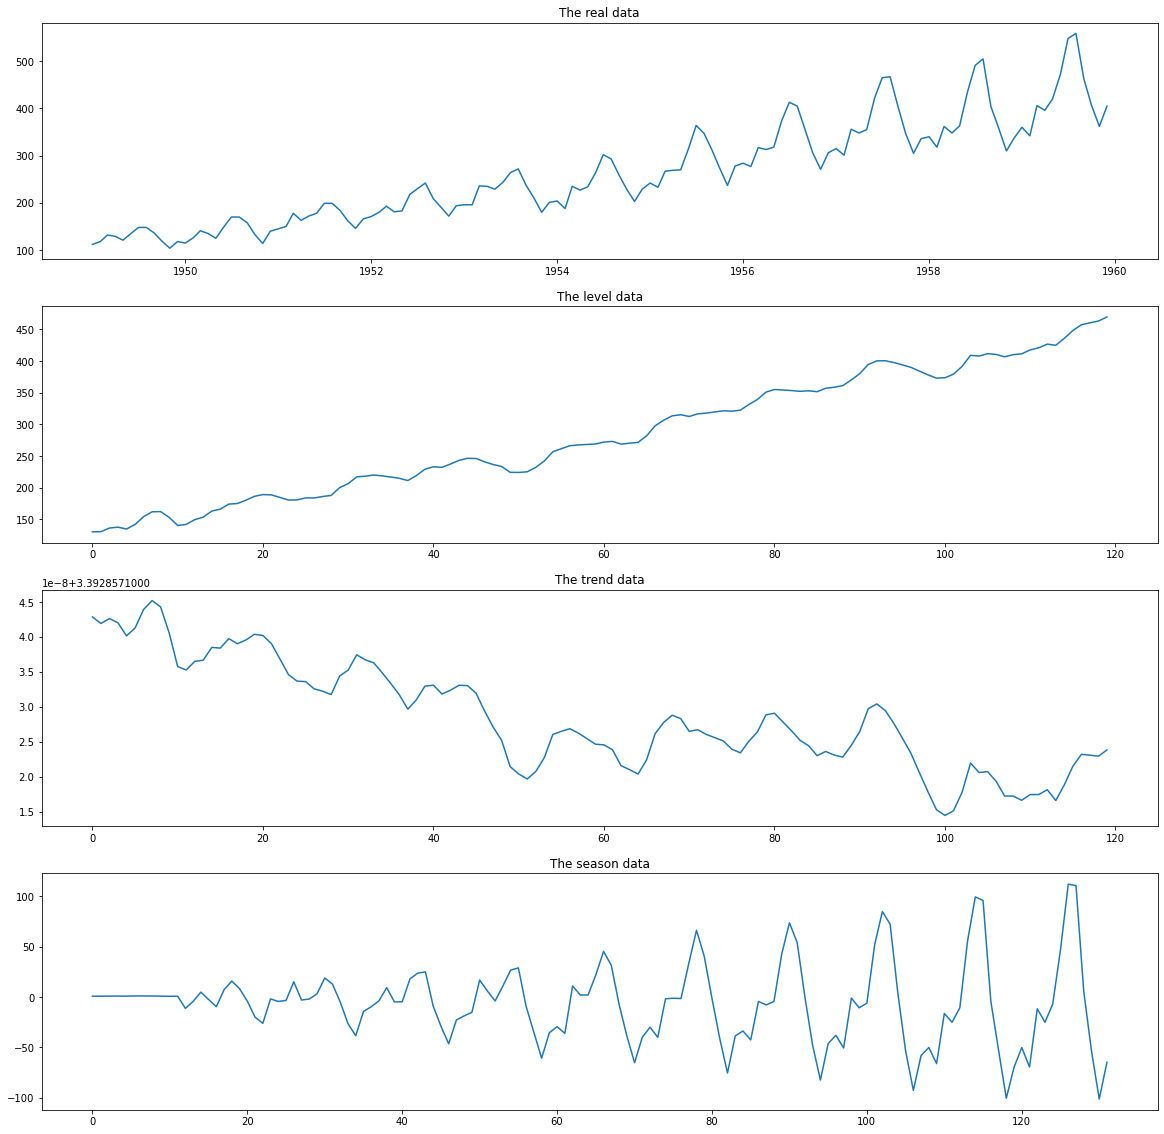

In [265]:
fig, axes = plt.subplots(4, 1, figsize=(20, 20))
axes[0].plot(train)
axes[0].set_title("The real data")

axes[1].plot(lts)
axes[1].set_title("The level data")

axes[2].plot(bts)
axes[2].set_title("The trend data")

axes[3].plot(sts)
axes[3].set_title("The season data");

So, by adding them all we get the forecast. I know I have not implemented the multiplicative version but still it is just the matter of tweaking code here to there.

# 

# See you in the next concept!